In [2]:
import mysql.connector as cnt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
salaries = pd.read_csv('salaries_1985to2018.csv')
players = pd.read_csv('players.csv')

In [251]:
DB = cnt.connect(
    host='88.223.121.130',
    port = 3306,
    user = 'user',
    password = 'slaptazodis'
)

c = DB.cursor()

In [252]:
# c.execute('use works')

https://www.kaggle.com/datasets/thedevastator/exploring-nba-player-performance-and-salaries-19

NBA teams all budget combined of 1985-2018 seasons

In [82]:
sum = salaries.pivot_table(index="team", values="salary", aggfunc="sum")

sum1 = sum.sort_values("salary", ascending=False)

display(sum1)

,salary
team,
New York Knicks,2015743494
Portland Trail Blazers,1785664201
Los Angeles Lakers,1710028427
Dallas Mavericks,1705480279
Miami Heat,1587451519
Cleveland Cavaliers,1568377266
Boston Celtics,1558256439
San Antonio Spurs,1540430036
Orlando Magic,1522233207


Fun fact New York Knicks not won once during these seasons

Total amount of budgets yearly growth

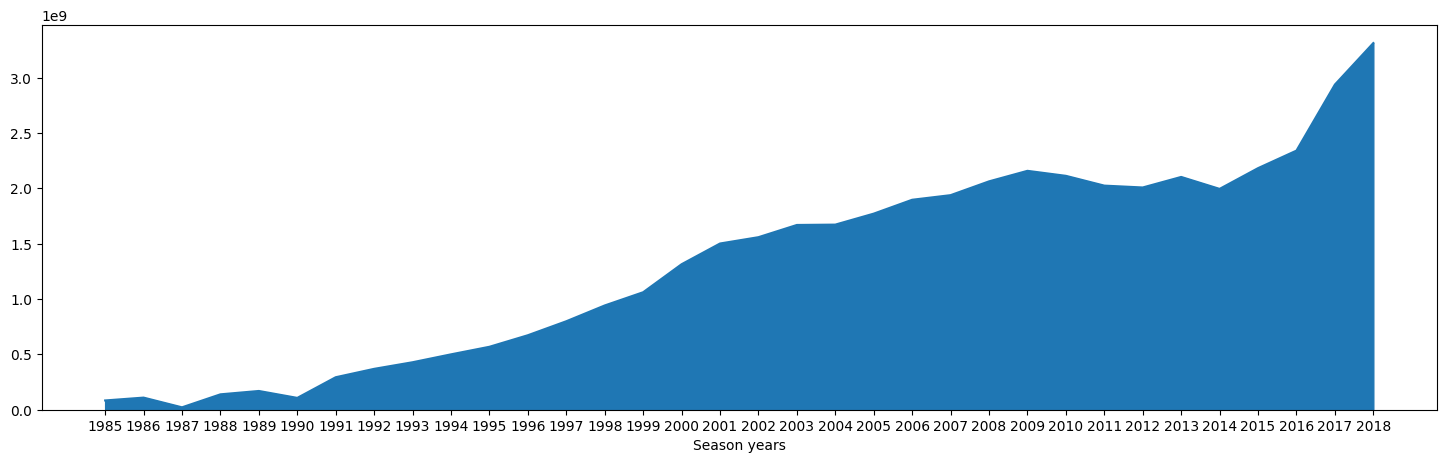

,salary,team
season_end,,
1985,83749000,23
1986,109550605,23
1987,21721333,16
1988,139138907,23
1989,169491523,25
1990,106940000,24
1991,293563000,27
1992,369332000,27
1993,428950180,27


In [52]:
fig, ax = plt.subplots(figsize=(18, 5))

sum3 = salaries.pivot_table(index="season_end", values="salary", aggfunc="sum")
sum4 = sum3.groupby("season_end")["salary"].sum()
sum5 = sum4.sort_index()
ax = sum5.plot(kind="area")

ax.set_xticks(sum5.index)
ax.set_xlabel("Season years")

plt.show()

sujungti = pd.concat([sum3, salaries.groupby("season_end")["team"].nunique()], axis=1)

display(sujungti)




_________________________________________________________________________________________________________________________________________________________

Most expensive NBA player in each year 

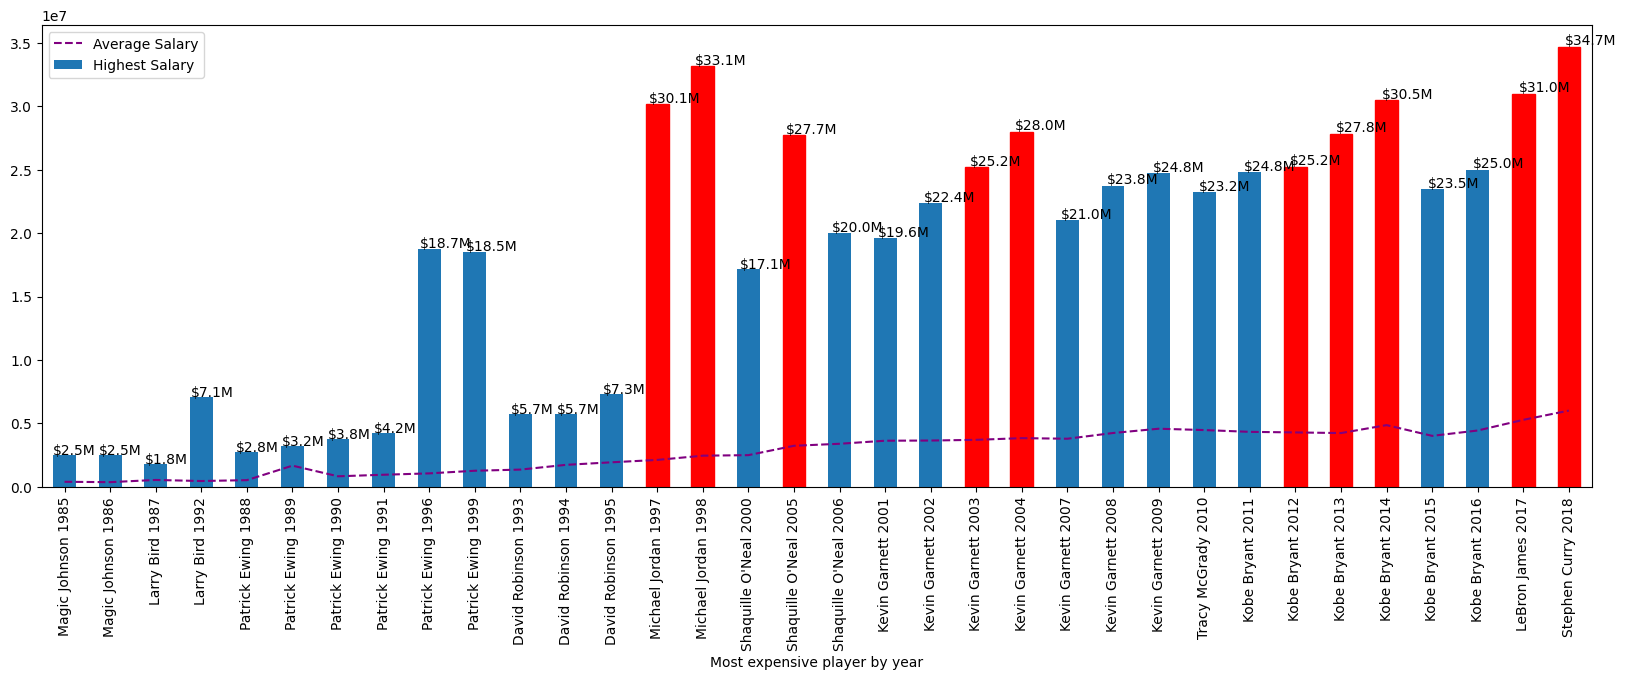

In [80]:
fig, ax = plt.subplots(figsize=(20, 6))

salariesy = salaries.groupby("season_end")
topid = salariesy["salary"].idxmax()
tops = salaries.loc[topid]

join = pd.merge(tops, players, left_on="player_id", right_on="_id")
join.plot.bar(x="name", y="salary", ax=ax,  label='Highest Salary')

avg = salaries.groupby("season_end")["salary"].mean()
avg.index = join.index
avg.plot(y="salary", ax=ax, color="purple", linestyle="dashed", label='Average Salary')

for p in ax.patches:
    if p.get_height() > 25000000:
        p.set_color('red')
    ax.annotate(f"${p.get_height()/1000000:,.1f}M", (p.get_x()* 1.005, p.get_height()* 1.005))

join["name_season_end"] = join["name"] + " " + join["season_end"].astype(str)
ax.set_xticks(range(len(join)))
ax.set_xticklabels(join["name_season_end"])

ax.set_xlabel('Most expensive player by year')
ax.legend()
plt.xticks(rotation=90)
plt.show()

_________________________________________________________________________________________________________________________________________________________

Best of 4 most paid NBA players accuracy

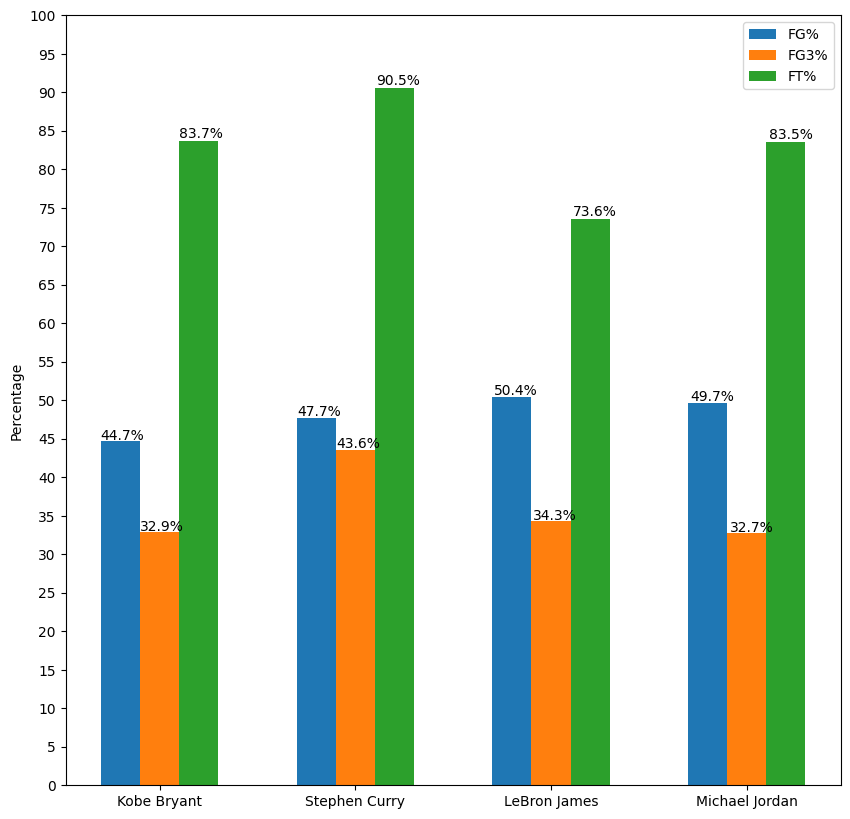

In [7]:
best = players[players["name"].isin(["Stephen Curry", "LeBron James", "Kobe Bryant", "Michael Jordan"])]

rr = np.arange(len(best))
width = 0.2
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(rr - width, best["career_FG%"].astype(float), width, label="FG%")
ax.bar(rr, best["career_FG3%"].astype(float), width, label="FG3%")
ax.bar(rr + width, best["career_FT%"].astype(float), width, label="FT%")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", (p.get_x()* 1.005, p.get_height()* 1.005))

ax.set_xticks(rr)
ax.set_xticklabels(best["name"])

ax.set_ylabel("Percentage")
ax.legend()
ax.set_yticks(np.arange(0, 101, 5))
plt.show()

Sorted top 100 players with highiest salaries. Find which college grew most NBA superstars

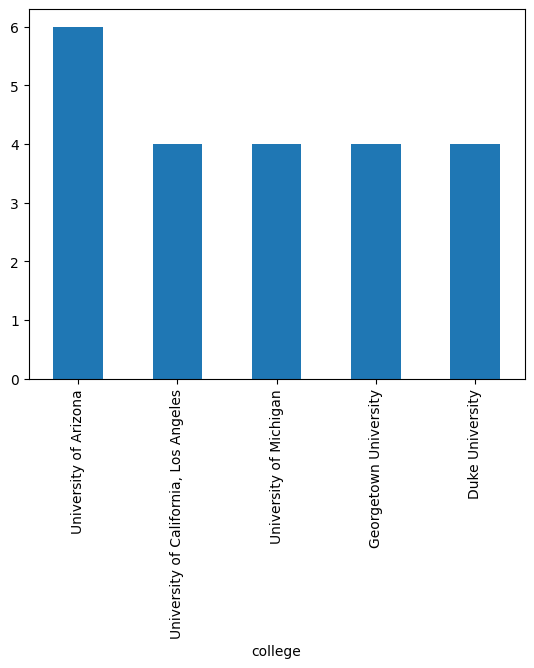

In [83]:
grouped = salaries.groupby(['player_id'])['salary'].sum()
grouped = grouped.sort_values(ascending=False)
grouped = grouped.head(100)

merged_df = pd.merge(grouped,players, left_on='player_id', right_on='_id')
grouped_college = merged_df.groupby(['college']).size()
grouped_college = grouped_college.sort_values(ascending=False)
grouped_college = grouped_college.head(5)
grouped_college.plot(kind='bar')

plt.show()

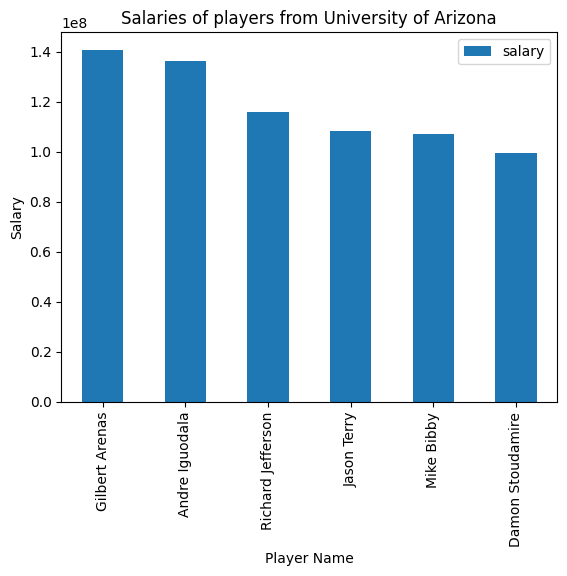

In [84]:
college_df = merged_df[merged_df['college'] == 'University of Arizona']
college_df.plot(x='name', y='salary', kind='bar', title='Salaries of players from University of Arizona')
plt.xlabel('Player Name')
plt.ylabel('Salary')
plt.show()

From SQL Dallas Mavericks and Golden State Warriors 2012-2018 seasons 3 points accuracy %

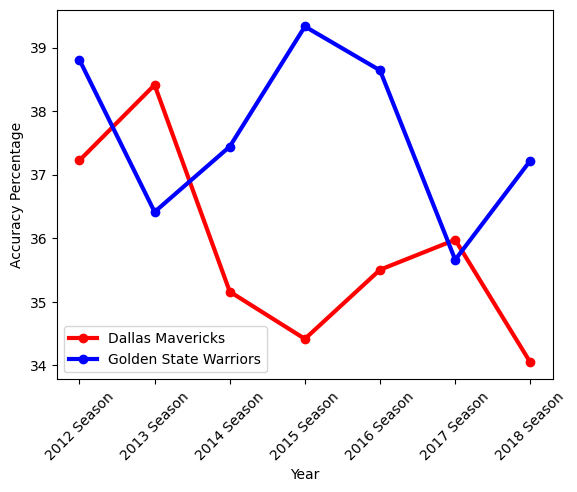

In [270]:
sql = """select d.YEAR, (sum(d.`three points made`) / sum(d.`three points attempted`)) * 100 AS three, g.Season, (sum(g.`tpm`) / sum(g.`tpa`)) * 100 AS threee
from `DALLAS MAVERICKS - 1` d
join `GOLDEN STATE WARRIORS PLAYOFFS STATS  - 1` g on d.YEAR = g.Season
where d.YEAR <> 2020
group by d.YEAR, g.Season"""

c.execute(sql)
ats = c.fetchall()

years = []
accuracy =[]

for eil in ats:
    accuracy.append(eil[1])
    years.append(eil[0])

years1 = []
accuracy1 = []

for eil in ats:
    accuracy1.append(eil[3])
    years1 = years

fig, ax = plt.subplots()

ax.plot(years, accuracy, lw=3, marker='o', color='red', label='Dallas Mavericks')
ax.plot(years, accuracy1, lw=3, marker='o', color='blue', label='Golden State Warriors')

ax.set_xlabel("Year")
ax.set_ylabel("Accuracy Percentage")

plt.xticks(rotation=45)
plt.legend()
plt.show()